In [17]:
#Groups aminoacid based on polarity/acidity
def group(list):
    grouped=[]
    nonpolar=['G','A','V','L','I','P','F','W','M']
    polar=['S','T','C','Y','N','Q']
    basic=['K','R','H']
    acidic=['D','E']
    for item in list:
        new_item=''
        for letter in item:
            if letter in nonpolar:
                new_item+='N'
            if letter in polar:
                new_item+='P'
            if letter in basic:
                new_item+='B'
            if letter in acidic:
                new_item+='A'
        grouped.append(new_item)
    return grouped
group('ABDEF')

['N', '', 'A', 'A', 'N']

In [3]:
def get_letter_frequency(list):
    letters={
        'A':0,
        'G':0,
        'V':0,
        'L':0,
        'I':0,
        'P':0,
        'F':0,
        'W':0,
        'M':0,
        'S':0,
        'T':0,
        'C':0,
        'Y':0,
        'N':0,
        'Q':0,
        'K':0,
        'R':0,
        'H':0,
        'D':0,
        'E':0
    }
    for word in list:
        for letter in word:
            letters[letter] +=1
    return letters

{'A': 3,
 'G': 0,
 'V': 0,
 'L': 0,
 'I': 0,
 'P': 0,
 'F': 2,
 'W': 0,
 'M': 0,
 'S': 0,
 'T': 0,
 'C': 1,
 'Y': 0,
 'N': 0,
 'Q': 2,
 'K': 0,
 'R': 0,
 'H': 0,
 'D': 1,
 'E': 0}

### Return the intersection of all files in a folder

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlrd
import numpy as np

# gets the intersection of files (i.e; what's in all files )
mapp='WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
i=0
for file in files_xlsx:
    if i==0:
        data = pd.read_excel(mapp+ '/' +file, 'peptide')
        df = df.append(data)
        i=i+1
    else: 
        data = pd.read_excel(mapp+ '/' +file, 'peptide')
        df=df.merge(data, how='inner', on='Peptide')
df=df[['Peptide','Accession','Mass','RT','Length','#Feature']]
df

,Peptide,Accession,Mass,RT,Length,#Feature
0,TYFPHFDLSHGSAQV,sp|P69905|HBA_HUMAN,1704.7896,73.91,15,4
1,YFPHFDLSHGSAQV,sp|P69905|HBA_HUMAN,1603.7419,68.07,14,4
2,FDTASTGKTFPGFFSPM(+15.99),sp|P02671|FIBA_HUMAN,1852.8341,97.05,17,5
3,YTGIFTDQVLSVLKGEE,sp|P02655|APOC2_HUMAN,1897.9673,111.04,17,5
4,AALLSPYSYSTTAVVTNPKE,sp|P02766|TTHY_HUMAN,2111.0786,76.19,20,5
...,...,...,...,...,...,...
857,LEEKPAVPVPER,sp|Q8WZ42|TITIN_HUMAN,1362.7506,16.61,12,2
858,DEVGGEALGRL,sp|P68871|HBB_HUMAN,1114.5618,48.29,11,2
859,SEETKENEGFTVT,sp|P01024|CO3_HUMAN,1469.6521,19.01,13,2
860,GGHLDQQ(+.98)VEEF,sp|P06727|APOA4_HUMAN,1258.5465,40.69,11,2


In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlrd
import numpy as np

# gets the intersection of files (i.e; what's in all files )
mapp='peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
i=0
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    df = df.append(data)

df=df[['Peptide','Accession','Mass','RT','Length','#Feature']]
df['count'] = 1
df = df.groupby(['Peptide']).sum()
df_inter = df.loc[(df['count'] == 5)] #intersection
df_sym = df.loc[(df['count'] == 1)] #symmetric difference
df_inter

,Mass,RT,Length,#Feature,count
Peptide,,,,,


In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlrd
import numpy as np
from matplotlib_venn import venn2, venn3
import openpyxl
import seaborn as sns

def slicydicy(word):
    word= word.split('|')[2]
    word=word.split(':')[0]
    word=word.split('_')[0]
    return word

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data=data.loc[data['#Feature']>=4]
    df = df.append(data)

df.dropna(subset=['Accession'], inplace=True, how='any')
df.reset_index(drop=True)
df['count'] = 1
df['Accession']=df['Accession'].apply(lambda x: slicydicy(x))
df = df.groupby(['Accession']).sum()
tot=df['#Feature'].sum()
df=df.sort_values(['#Feature'], ascending=False)[0:30]
df=df['#Feature']
df_misc=df[10:len(df)]
df_imp=df[0:10]
df_list_imp=list(df_imp)
other =df_misc.sum()
df_list_imp.append(other)
df_list_imp

[2298, 1255, 876, 417, 381, 230, 198, 162, 123, 114, 1050]

In [308]:
colors=['#CF004A',
'#6E6A86'
,'#8967D9',
'#39A07D',
'#9DB5D9',
'#54BB66',
'#674BC2',
'#C0C8D6',
'#D785CC',
'#3DB122',
'#C35316',
'#C690E9']
df_misc.sum()
len(df_imp)
test =(list(df_imp.keys()))
test.append('Other')
test

['FIBA',
 'HBA',
 'APOA4',
 'A1AT',
 'APOB',
 'ITIH4',
 'APOA1',
 'HBB',
 'G3P',
 'APOC2',
 'Other']

Text(0.5, 1.0, 'Ninf')

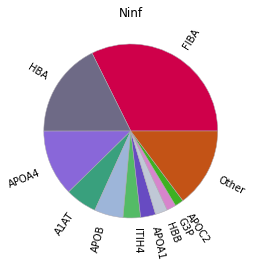

In [311]:
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
plt.pie(list(df_list_imp),labels = test , wedgeprops=wp, rotatelabels=True, colors=colors) 
plt.title('Ninf')

Text(0.5, 1.0, 'Inf')

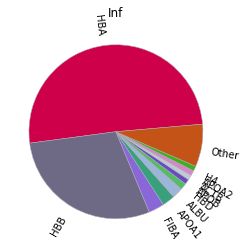

In [305]:
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
plt.pie(list(df_list_imp),labels = test , wedgeprops=wp, rotatelabels=True, colors=colors,startangle= 5 ) 
plt.title('Inf')

Text(0.5, 1.0, 'WF')

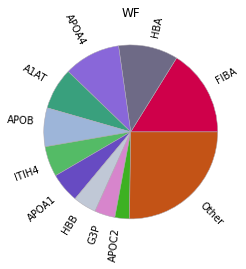

In [309]:
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
plt.pie(list(df_list_imp),labels = test , wedgeprops=wp, rotatelabels=True, colors=colors) 
plt.title('WF')

In [302]:
testing='sp|asda|oooh_hehe'
testing=testing.split('|')[2]
testing.split('_')[0]

'oooh'